In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import seaborn as sns
from scipy.stats import poisson

Reading from file

In [2]:
os.chdir('C:\\Users\\alina\\Desktop\\coursework\\')

events = []
time = []
with open ('spectr31102023-1.dat') as file:
    for line in file:
        idx_sep1 = line.find("-")
        line = line[:idx_sep1 - 1]
        idx_sep2 = line.find(" ")
        events.append(int(line[:idx_sep2]))
        time.append(float(line[idx_sep2+1:]))

In [3]:
results = list(zip(events, time))
results = np.array(results)

Split into intervals

In [25]:
sample = []
interval = 150

prev_time = 0
prev_event = 0
for [cur_event, cur_time] in results:
    if cur_time - prev_time >= interval:
        prev_time = cur_time
        sample.append(cur_event-prev_event)
        prev_event = cur_event
        
sample = np.array(sample)
        

Building distributions

In [26]:
mean = np.mean(sample)
number_of_events = np.shape(sample)[0]

In [27]:
unique, counts = np.unique(sample, return_counts=True)
data = dict(zip(unique.astype('int'), counts))

data_x = np.array(list(map(int, data.keys())))
data_y = np.array(list(map(int, data.values())))

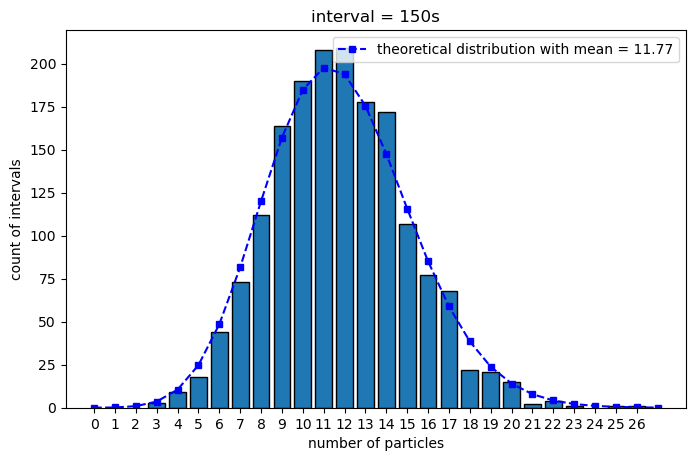

In [28]:
plt.figure(figsize=(8,5), dpi=100)

plt.xticks(list(range(0, int(max(unique))+1)))

plt.xlabel('number of particles')
plt.ylabel('count of intervals')
plt.title('interval = ' + str(interval) + 's')

#real distribution
plt.bar(data_x, data_y, ec='black')
#y_error = mean/np.sqrt(number_of_events)
#plt.errorbar(data_x, data_y, yerr=y_error, fmt="o", color="r")

#theoretical distribution
n = np.arange(0, int(max(unique))+2, 1)
y = poisson.pmf(n, mu=mean)
plt.plot(n, y * number_of_events, 'bs--', ms=4, label=f'theoretical distribution with mean = {round(mean, 2)}')

plt.legend()

#plt.savefig('real_distribution_' + str(interval) + '.jpg', dpi=300)

plt.show()

In [ ]:
погрешность

Мусор

### Theoretical model

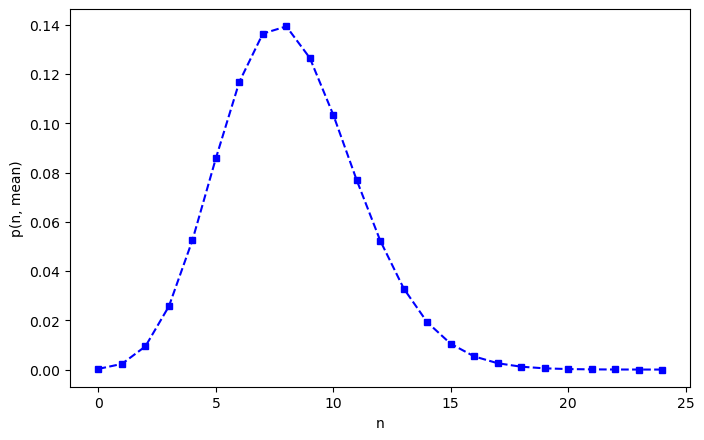

In [75]:
n = np.arange(0, 25, 1)
distribution = np.exp(-mean)*np.power(mean, n)/factorial(n)
y = poisson.pmf(n, mu=mean)

plt.figure(figsize=(8,5), dpi=100)

plt.plot(n, y, 'bs--', markersize=4)
plt.xlabel('n')
plt.ylabel('p(n, mean)')

#plt.savefig('event distribution.jpg', dpi=300)

plt.show()